This solution predicts online shoppers’ purchasing intention using best classification model 
which is selected using a machine learning pipeline that examinees three classification models, 
determines best performing model and its parameters based on cross-validation scores.
Additionaly accuracy, precision, recall, f1 and confusion matrix scores are calculated and 
visualizations display models accuracy scores and confusion matrix.

Online shopppers registered 12,330 transactional sessions during their visit in a website sale point
each session belongs to a different user in a 1-year period to avoid any tendency to a specific 
campaign, special day, user profile, or period.

Now, having the best classification model and upcomming real time new sessions this model will 
be able to predict the visitor’s shopping intent and Web site abandonment likelihood providing
insight on what sales and promotion campaign apply to each case.

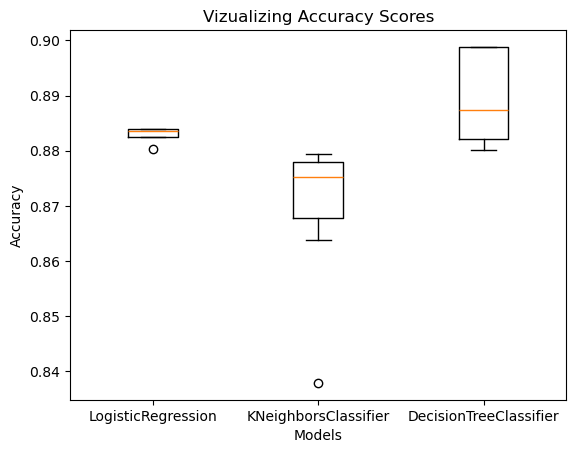


Best Model and its parameters selection:
Best Model: DecisionTreeClassifier
Best Model Parameters: {'DecisionTreeClassifier__max_depth': 5, 'DecisionTreeClassifier__min_samples_split': 2, 'DecisionTreeClassifier__random_state': 42}
Best Model CV Score: 0.8988247014204951

Key performance metrics for DecisionTreeClassifier:
Accuracy: 0.8970
Precision: 0.7270
Recall: 0.5366
F1 Score: 0.6175



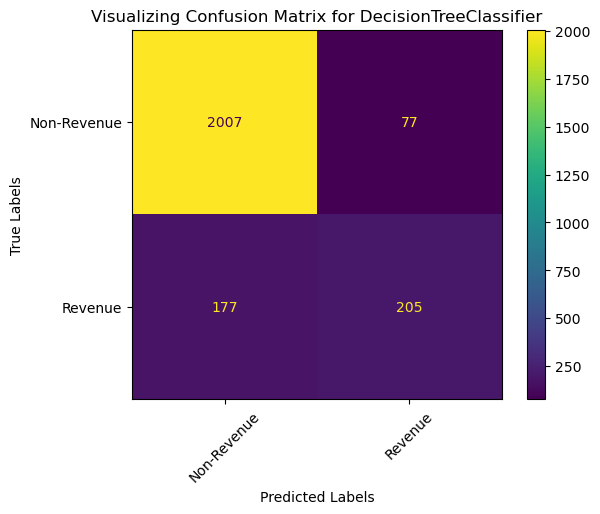


Classification Report values for DecisionTreeClassifier:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2084
        True       0.73      0.54      0.62       382

    accuracy                           0.90      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.89      0.90      0.89      2466



In [27]:
# Importing required libraries
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Reading CSV file
# Original file @ https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset was
# transformed in two columns: "Month" and "VisitorType" to use only integers and not strings
df = pd.read_csv("online_shoppers_intention - Copy.csv")

# Creating features and class label
X = df.drop('Revenue', axis=1)
y = df['Revenue'] 

# Creating training and testing sets (stratifying to balance the class)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Declaring models to be compared one to each other
models = {"LogisticRegression": LogisticRegression(), 
          "KNeighborsClassifier": KNeighborsClassifier(),
          "DecisionTreeClassifier": DecisionTreeClassifier()}

# Declaring model parameters options/ranges best fit using Grid Search
param_grid = {"LogisticRegression": {"LogisticRegression__C": [0.01, 0.1, 1, 10]},
              "KNeighborsClassifier": {"KNeighborsClassifier__n_neighbors": range(1,10)},
              "DecisionTreeClassifier": {"DecisionTreeClassifier__max_depth": [2, 5, 10],
           "DecisionTreeClassifier__min_samples_split": [2, 5, 10, 20],
           "DecisionTreeClassifier__random_state": [42]}}

# Declaring cross-validation parameters (KFold) to ensure that model generalizes well on unseen data
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Declaring variables to save Grid Search CV results
pipe_accuracies = {}
pipe_params = {}
pipelines = {}
results = {}

# looping through the models comparison GridSearchCV is used to find the best parameter combination for each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        (name, model)
    ])
    # Creating the GridSearchCV object
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=kf, scoring="accuracy")
    
    # Performing grid search and fit the model and store the results
    grid_search.fit(X_train, y_train)
    pipe_accuracies[name] = grid_search.best_score_
    pipe_params[name] = grid_search.best_params_
    pipelines[name] = grid_search
    mean_scores = grid_search.cv_results_['mean_test_score']
    results[name] = mean_scores

# Vizualizing Results
plt.boxplot(results.values(), tick_labels=results.keys())
plt.title('Vizualizing Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Selecting and printing the best model based on the best cross-validation score
best_model_name =  max(pipe_accuracies, key=pipe_accuracies.get)
best_model_cv_score = max(pipe_accuracies.values())
best_model_info = pipe_params[best_model_name]
print('\nBest Model and its parameters selection:')
print(f"Best Model: {best_model_name}")
print(f"Best Model Parameters: {best_model_info}")
print(f"Best Model CV Score: {best_model_cv_score}\n")

# Calculating and printing key performance metrics
y_pred = pipelines[best_model_name].predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Key performance metrics for {best_model_name}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}\n")

# Visualizing Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=pipelines[best_model_name].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipelines[best_model_name].classes_)
disp.plot()
plt.title(f'Visualizing Confusion Matrix for {best_model_name}')
plt.xticks(tick_marks, ['Non-Revenue', 'Revenue'], rotation=45)
plt.yticks(tick_marks, ['Non-Revenue', 'Revenue'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Printing Classification Report values 
print(f'\nClassification Report values for {best_model_name}:\n{classification_report(y_test, y_pred)}')